In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

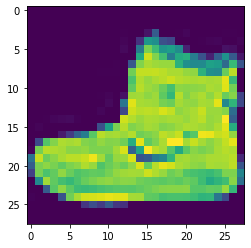

In [5]:
plt.imshow(X_train[0])

In [6]:
X_train.max()

255

In [7]:
X_train = X_train/255

In [8]:
X_test = X_test/255

In [9]:
X_train = X_train.reshape(60000,28,28,1)

In [10]:
X_test = X_test.reshape(10000,28,28,1)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [16]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation="relu"))

model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_train,y_cat_train,validation_data=(X_test,y_cat_test),epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.4074 - accuracy: 0.8538 - val_loss: 0.3272 - val_accuracy: 0.8829
Epoch 2/3
60000/60000 [==============================] - 54s 899us/sample - loss: 0.2804 - accuracy: 0.8980 - val_loss: 0.2845 - val_accuracy: 0.8943
Epoch 3/3
60000/60000 [==============================] - 55s 917us/sample - loss: 0.2378 - accuracy: 0.9139 - val_loss: 0.2669 - val_accuracy: 0.9014


In [20]:
model.metrics_names

['loss', 'accuracy']

In [23]:
metrics = pd.DataFrame(model.history.history)

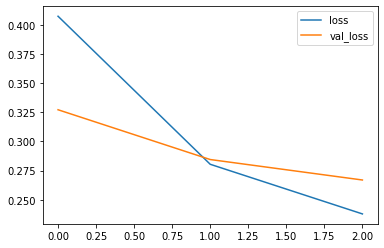

In [24]:
metrics[["loss","val_loss"]].plot()

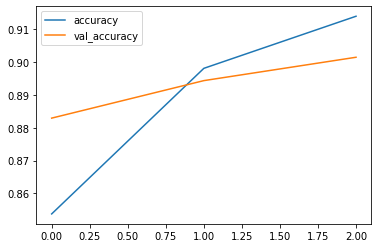

In [25]:
metrics[["accuracy","val_accuracy"]].plot()

In [26]:
from sklearn.metrics import classification_report

In [27]:
predictions = model.predict_classes(X_test)

In [ ]:
print(classification_report(y_test,predictions))